In [ ]:
import json
import pandas as pd
from konlpy.tag import Okt
from konlpy.tag import Kkma
import numpy as np
from wordcloud import WordCloud # 워드클라우드 제작 라이브러리
import matplotlib.pyplot as plt # 워드클라우드 시각화 라이브러리
import konlpy

In [ ]:
with open('book_review_all.json') as f:
    js = json.loads(f.read())          ## json 라이브러리 이용
book = pd.read_json('book_review_all.json')

In [ ]:
#소설 (gerne 1)
g1=book.iloc[0:50]
g11 = g1.explode('review')
g11

,category,title,author,review
0,소설,돌연한 출발,프란츠 카프카,얼마나 재밌을지 기대되요
0,소설,돌연한 출발,프란츠 카프카,표지도 너무 이쁘고 책의날 카프카를 읽을수 있었네요
0,소설,돌연한 출발,프란츠 카프카,최고의책이에요 조아요
0,소설,돌연한 출발,프란츠 카프카,프라하에 가고싶다. 죽기 전에
0,소설,돌연한 출발,프란츠 카프카,돌연한 출발 천천히 곱씹으면서 읽고 있어요
...,...,...,...,...
49,소설,지구 끝의 온실,김초엽,작가님 기다렸습니다!! 믿고 읽는 김초엽 작가님ㅠㅠㅠㅠ완전 기대돼요
49,소설,지구 끝의 온실,김초엽,밀리에서 처음 읽었을 때부터 기다렸습니다 제대로 모시겠습니다
49,소설,지구 끝의 온실,김초엽,작가님 사랑해요 작가님이 우주 끝까지 가셔도 따라갈래요
49,소설,지구 끝의 온실,김초엽,이거 밀리의서재에서 읽고 너무 재밌어서 여기저기 다 추천하고 다녔었는데 이제 교보문...


In [ ]:
#특수문자 제거
g11['review'] = g11['review'].str.replace('[^가-힣]', '', regex = True)
g11['review']

0                                         얼마나 재밌을지 기대되요
0                          표지도 너무 이쁘고 책의날 카프카를 읽을수 있었네요
0                                           최고의책이에요 조아요
0                                      프라하에 가고싶다  죽기 전에
0                               돌연한 출발 천천히 곱씹으면서 읽고 있어요
                            ...                        
49                작가님 기다렸습니다   믿고 읽는 김초엽 작가님    완전 기대돼요
49                    밀리에서 처음 읽었을 때부터 기다렸습니다 제대로 모시겠습니다
49                       작가님 사랑해요 작가님이 우주 끝까지 가셔도 따라갈래요
49    이거 밀리의서재에서 읽고 너무 재밌어서 여기저기 다 추천하고 다녔었는데 이제 교보문...
49                                          사랑해요   완전기대
Name: review, Length: 26656, dtype: object

In [ ]:
kkma = konlpy.tag.Kkma() #형태소 분석기 꼬꼬마(Kkma)
nouns = g11['review'].apply(kkma.nouns)
nouns

0                                     [기대, 기대되요, 되요]
0                                 [표지, 책, 날, 카프카, 수]
0                                            [최고, 책]
0                                           [프라하, 전]
0                                   [돌, 돌연한, 연한, 출발]
                           ...                      
49                              [작가, 김, 김초엽, 초엽, 완전]
49                                           [처음, 때]
49                                   [작가, 사랑, 우주, 끝]
49    [이거, 서재, 여기저기, 추천, 이제, 교보, 교보문고, 문고, 수, 책, 강추]
49                                [사랑, 완전, 완전기대, 기대]
Name: review, Length: 26656, dtype: object

In [ ]:
#explode 함수를 통해 list 데이터를 한 행에 한 단어만 들어가도록 변경
nouns = nouns.explode()
df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word

,word,count
0,기대,2.0
0,기대되요,4.0
0,되요,2.0
0,표지,2.0
0,카프카,3.0
...,...,...
49,강추,2.0
49,사랑,2.0
49,완전,2.0
49,완전기대,4.0


In [ ]:
# Groupby 함수를 통해 단어별로 얼마나 쓰였는지 확인
# 가장 빈도가 많은 단어순으로 '내림차순' 
df_word = df_word.groupby('word', as_index = False).count().sort_values('count', ascending = False)
df_word

,word,count
9671,생각,2467
10494,소설,2138
15273,이야기,1856
16467,작가,1756
3297,내용,1580
...,...,...
10067,설를,1
10068,설립,1
10069,설립자,1
10071,설명도,1


In [ ]:
#불필요한 단어 제거
stop_words = ['소설', '이야기', '무엇', '처음', '하다', '마지막', '때문',
              '내가', '결국', '만큼', '주문', '다음', '나의', '있음']
df_word = df_word[~df_word.word.isin(stop_words)]
dic_word = df_word.set_index('word').to_dict()['count']

In [ ]:
#참고사이트:https://serendipity77.tistory.com/entry/%EC%98%81%ED%99%94%EB%8F%99%EA%B0%90-%EC%98%81%ED%99%94%EB%8F%99%EA%B0%90-%EB%8C%93%EA%B8%80-%EB%A6%AC%EB%B7%B0-%EC%9B%8C%EB%93%9C-%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9Cwordcloud%EB%A1%9C-%EB%A7%8C%EB%93%A4%EC%96%B4%EB%B3%B4%EA%B8%B0%ED%8C%8C%EC%9D%B4%EC%8D%AC-Python

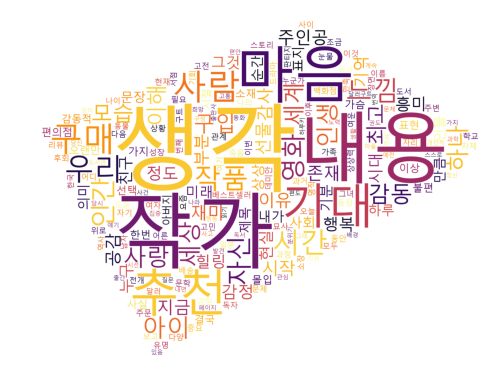

In [ ]:
img = PIL.Image.open('책_검은배경.jfif')
img_array = np.array(img)

wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250,
               background_color = 'white', mask=img_array, colormap='inferno')
gen = wc.generate_from_frequencies(dic_word)

plt.figure()
plt.axis('off') # 축 없애기
plt.imshow(gen)
plt.savefig('소설리뷰_워드클라우드') # 파일 저장

In [ ]:
#시,에세이(gerne 2)
g2=book.iloc[50:100]
g22 = g2.explode('review')
#특수문자 제거
g22['review'] = g22['review'].str.replace('[^가-힣]', ' ', regex = True)
g22['review']

50                           작가님의 다른책들도 읽어보았지만 항상 최고입니다
50                                   기대 만큼 너무 좋은 글이였습니다
50                       베스트셀러인 이유가 있는 책  부담없이 술술 읽히네요 
50                                 나라는 존재의 소중함을 느끼게 해주는
50    당신은 결국 무엇이든 해내는 사람 데일리로 항상 제 자신을 되돌아보면서 끊임없이 새...
                            ...                        
99                   가슴이 말랑해지는    쌀쌀한 가을 새벽에 읽기 좋은 그런 책
99    한경 작가님 팬이였는데 출간 소식듣고 한달음에 달려왔어요   하나하나 너무 따듯하고...
99    요즘 코로나로 너무 힘든 시기를 겪고 있는데 정말 따듯한 책이네요 책 선물같은거 한...
99                                  인생의 활력소가 되어 생동감을 느낌
99    내가 나에게 선물해 주고 싶은 책이라는 말에 끌려 구입했는데  정말 선물 같은 책이...
Name: review, Length: 20765, dtype: object

In [ ]:
kkma = konlpy.tag.Kkma()
g22['review'] = g22['review'].astype(str)
nouns = g22['review'].apply(kkma.nouns)
nouns = nouns.explode()

In [ ]:
df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word

,word,count
50,작가,2.0
50,최고,2.0
50,기대,2.0
50,만큼,2.0
50,베스트셀러,5.0
...,...,...
99,느낌,2.0
99,내가,2.0
99,선물,2.0
99,구입,2.0


In [ ]:
df_word = df_word.groupby('word', as_index = False).count().sort_values('count', ascending = False)
df_word

,word,count
3333,마음,2576
5660,생각,2017
9639,작가,1426
839,공감,1299
5252,사람,1138
...,...,...
6985,씀씀이,1
1654,기적과도,1
6981,쓰였졌습니,1
6980,쓰신,1


In [ ]:
dic_word = df_word.set_index('word').to_dict()['count']

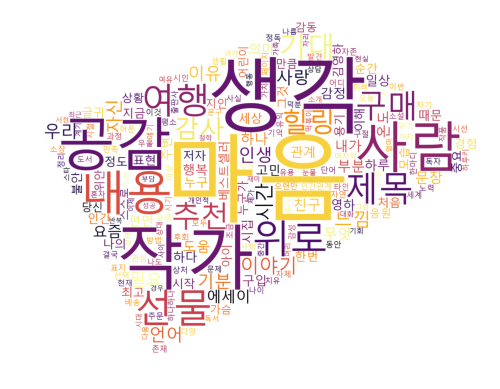

In [ ]:
from PIL import Image
img = Image.open('책_검은배경.jfif')
img_array = np.array(img)

wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250,
               background_color = 'white', mask=img_array, colormap='inferno')
gen = wc.generate_from_frequencies(dic_word)

plt.figure()
plt.axis('off') # 축 없애기
plt.imshow(gen)
plt.savefig('시에세이리뷰_워드클라우드') # 파일 저장